# CS381/780 Data Analytics Final Project

### Due on 12/13/2021 23:59 pm

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on the follwoing 

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Attribute Information:

Attribute 1: (qualitative)
Status of existing checking account
A11 : ... < 0 DM
A12 : 0 <= ... < 200 DM
A13 : ... >= 200 DM / salary assignments for at least 1 year
A14 : no checking account

Attribute 2: (numerical)
Duration in month

Attribute 3: (qualitative)
Credit history
A30 : no credits taken/ all credits paid back duly
A31 : all credits at this bank paid back duly
A32 : existing credits paid back duly till now
A33 : delay in paying off in the past
A34 : critical account/ other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
A40 : car (new)
A41 : car (used)
A42 : furniture/equipment
A43 : radio/television
A44 : domestic appliances
A45 : repairs
A46 : education
A47 : (vacation - does not exist?)
A48 : retraining
A49 : business
A410 : others

Attribute 5: (numerical)
Credit amount

Attibute 6: (qualitative)
Savings account/bonds
A61 : ... < 100 DM
A62 : 100 <= ... < 500 DM
A63 : 500 <= ... < 1000 DM
A64 : .. >= 1000 DM
A65 : unknown/ no savings account

Attribute 7: (qualitative)
Present employment since
A71 : unemployed
A72 : ... < 1 year
A73 : 1 <= ... < 4 years
A74 : 4 <= ... < 7 years
A75 : .. >= 7 years

Attribute 8: (numerical)
Installment rate in percentage of disposable income

Attribute 9: (qualitative)
Personal status and sex
A91 : male : divorced/separated
A92 : female : divorced/separated/married
A93 : male : single
A94 : male : married/widowed
A95 : female : single

Attribute 10: (qualitative)
Other debtors / guarantors
A101 : none
A102 : co-applicant
A103 : guarantor

Attribute 11: (numerical)
Present residence since

Attribute 12: (qualitative)
Property
A121 : real estate
A122 : if not A121 : building society savings agreement/ life insurance
A123 : if not A121/A122 : car or other, not in attribute 6
A124 : unknown / no property

Attribute 13: (numerical)
Age in years

Attribute 14: (qualitative)
Other installment plans
A141 : bank
A142 : stores
A143 : none

Attribute 15: (qualitative)
Housing
A151 : rent
A152 : own
A153 : for free

Attribute 16: (numerical)
Number of existing credits at this bank

Attribute 17: (qualitative)
Job
A171 : unemployed/ unskilled - non-resident
A172 : unskilled - resident
A173 : skilled employee / official
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)
Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
Telephone
A191 : none
A192 : yes, registered under the customers name

Attribute 20: (qualitative)
foreign worker
A201 : yes
A202 : no

### Your task in the final project is build the best predictive model to classify if a loan will carry good or bad credit risks. The focus should be in identifying bad risk loans

* Try at least two of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* Answer the question whether past credit history will be an important factor or not.

### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations

In [26]:
df = pd.read_csv("german_credit_modified.csv")
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,2


In [27]:
df['Risk'] = df['Risk'].apply(lambda x: 'good' if x == 1 else 'bad')

In [28]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,bad


<AxesSubplot:xlabel='Risk', ylabel='count'>

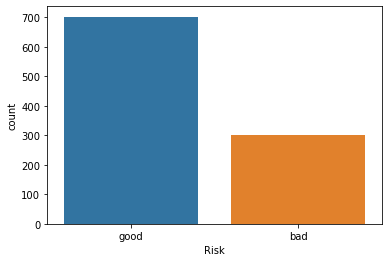

In [29]:
sns.countplot(df['Risk'])

***The original dataset is hard to understand. So we are going to decode the fields to an easier to understand format***

In [30]:
decode_map = {'A11': 'little', 'A12': 'moderate', 'A13': 'rich', 'A14': 'No Account',
              'A30': 'paid back', 'A31': 'paid back', 'A32': 'paid back', 
              'A33': 'delay', 'A34': 'default',
              'A40' : 'car',
              'A41' : 'car',
              'A42' : 'furniture/equipment',
              'A43' : 'radio/television',
              'A44' : 'domestic appliances',
              'A45' : 'repairs',
              'A46' : 'education',
              'A47' : 'vacation',
              'A48' : 'retraining',
              'A49' : 'business',
              'A410' : 'others',
              'A61' :  'little',
              'A62' :  'moderate',
              'A63' :  'quite rich',
              'A64' :  'rich',
              'A65' :  'unknown',
              
              'A71' : 'unemployed',
              'A72' : '< 1 year',
              'A73' : '1 to <4 years',
              'A74': '4 to <7 years',
              'A75' : '>= 7 years',

              'A91' : 'male   : divorced/separated',
              'A92' : 'female : divorced/separated/married',
              'A93' : 'male   : single',
              'A94' : 'male   : married/widowed',
              'A95' : 'female : single',
              
              'A101' : 'none',
              'A102' : 'co-applicant',
              'A103' : 'guarantor',

              'A121' : 'real estate',
              'A122' : 'life insurance',
              'A123' : 'car',
              'A124' : 'no property',
              
              'A141' : 'bank',
              'A142' : 'stores',
              'A143' : 'none',
              'A151' : 'rent',
              'A152' : 'own',
              'A153' : 'for free',


              'A171' : 'unemployed/non-resident',
              'A172' : 'unskilled/resident',
              'A173' : 'skilled employee',
              'A174' : 'management/highly qualified employee',
            
             }

In [31]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: decode_map[x] if x in decode_map.keys() else x)

In [32]:
df.head()

,Checking Account,Duration,Credit History,Purpose,Credit Amount,Saving Account,Employment Status,Installment Rate,Personal Status,Guarantors,Years in current address,Property,Age,Installment plans,Housing,Existing Credits,Job,Liable,Risk
0,little,6,default,radio/television,1169,unknown,>= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee,1,good
1,moderate,48,paid back,radio/television,5951,little,1 to <4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee,1,bad
2,No Account,12,default,education,2096,little,4 to <7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled/resident,2,good
3,little,42,paid back,furniture/equipment,7882,little,4 to <7 years,2,male : single,guarantor,4,life insurance,45,none,for free,1,skilled employee,2,good
4,little,24,delay,car,4870,little,1 to <4 years,3,male : single,none,4,no property,53,none,for free,2,skilled employee,2,bad


In [34]:
df.shape

(1003, 19)

***Now you can start from this dataset***

### Good Luck !!!

Show all your work below